In [72]:
import pandas as pd
df = pd.read_excel("05_data1.xlsx", index_col = 0)

In [73]:
df

,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
no,,,,,,,,,,,,,,,,,
1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,31,2,11,155,55,68.0,132,82,97,198,60,80.0,106,10.6,0.9,1,1
7650,42,1,13,155,60,79.0,123,68,90,157,122,46.0,86,15.0,0.8,1,0
7651,41,1,9,165,60,85.0,118,81,81,100,55,46.0,43,15.1,0.8,1,0


In [74]:
#1->men

In [75]:
data6=df.loc[:,['gender','height','weight','waist','drinking','smoking']]

data6.loc[data6['gender']==1, ['gender']]='M'
data6.loc[data6['gender']==2, ['gender']]='F'
data6.loc[data6['drinking']==0, ['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1, ['drinking']]='drinking'
data6.loc[data6['smoking']==1, ['smoking']]='Non-smoking'
data6.loc[data6['smoking']==2, ['smoking']]='semi'
data6.loc[data6['smoking']==3, ['smoking']]='smoking'

In [76]:
data6


,gender,height,weight,waist,drinking,smoking
no,,,,,,
1,M,165,60,72.1,Non-drinking,Non-smoking
5,F,155,50,75.2,Non-drinking,Non-smoking
6,M,185,85,94.0,drinking,smoking
7,M,165,80,93.0,drinking,smoking
9,F,150,50,82.0,Non-drinking,Non-smoking
...,...,...,...,...,...,...
7648,F,155,55,68.0,drinking,Non-smoking
7650,M,155,60,79.0,Non-drinking,Non-smoking
7651,M,165,60,85.0,Non-drinking,Non-smoking


In [77]:
drinking=data6.groupby(['gender','drinking'])['drinking'].count()
smoking=data6.groupby(['gender','smoking'])['smoking'].count()
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')
drinking = drinking.reset_index()
smoking = smoking.reset_index()

In [78]:
drinking

,gender,drinking,count
0,F,Non-drinking,888
1,F,drinking,611
2,M,Non-drinking,415
3,M,drinking,1086


In [79]:
smoking

,gender,smoking,count
0,F,Non-smoking,1422
1,F,semi,45
2,F,smoking,32
3,M,Non-smoking,502
4,M,semi,519
5,M,smoking,480


In [80]:
data=df.loc[:,['gender','height','weight','age_code','blood_sugar']]

data.loc[data['gender']==1, ['gender']]='M'
data.loc[data['gender']==2, ['gender']]='F'


In [81]:
data

,gender,height,weight,age_code,blood_sugar
no,,,,,
1,M,165,60,9,90
5,F,155,50,12,110
6,M,185,85,9,86
7,M,165,80,9,250
9,F,150,50,17,104
...,...,...,...,...,...
7648,F,155,55,11,97
7650,M,155,60,13,90
7651,M,165,60,9,81


In [82]:
group1=data.loc[data['blood_sugar']>=120,['gender']]
group1

data.loc[data['blood_sugar']>=120, ['blood_sugar']]='120over'
data.loc[data['blood_sugar']!='120over', ['blood_sugar']]='120under'

In [83]:
sugar=data.groupby(['gender','blood_sugar'])['gender'].count()
sugar = sugar.to_frame(name='count')
sugar = sugar.reset_index()

In [84]:
sugar

,gender,blood_sugar,count
0,F,120over,145
1,F,120under,1354
2,M,120over,276
3,M,120under,1225


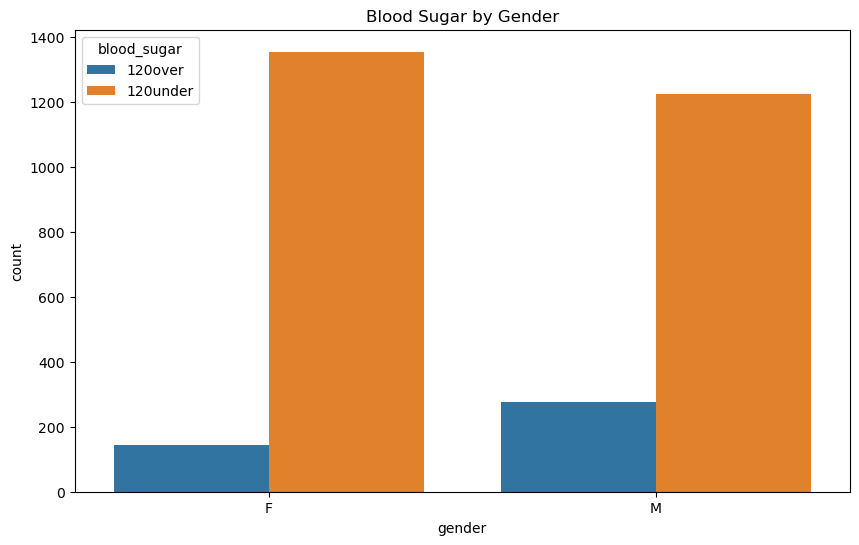

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=sugar, x='gender', y='count', hue='blood_sugar')

plt.title('Blood Sugar by Gender')
plt.show()